# Kelvin Lehrback

## Ciência de dados é uma arte

Ciência de dados é a arte de transformar números em histórias, padrões em descobertas e dados em decisões que iluminam o futuro.

# Conjunto de dados de partidas de xadrez, extraidos do Kaggle.

Disponível em: https://www.kaggle.com/datasets/datasnaek/chess/data\

## Primeiro, vamos extrair os dados e visualizar as colunas

In [48]:
import pandas as pd

dataframe = pd.read_csv("games.csv", sep=",")
print(dataframe.keys())

#Mostrando algumas linhas do dataframe
dataframe.head()

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


### Tamanho do dataset

In [49]:
print(dataframe.shape)

(20058, 16)


## Temos as colunas de:
* id;
* rated;
* created_at;
* last_move_at;
* turns;
* victory_status;
* winner;
* increment_code;
* white_id;
* white_rating;
* black_id;
* black_rating;
* moves;
* opening_eco;
* opening_name;
* opening_ply;


## Traduzindo de forma livre:
* ID (Identificação do jogo);
* Ranqueada (V/F);
* Hora de início;
* Hora de fim;
* Número de turnos;
* Status do jogo;
* Ganhador;
* Incremento de tempo;
* ID do jogador branco;
* Classificação do jogador branco;
* ID do jogador preto;
* Classificação do Jogador preto;
* Movimentos (na notação padrão do xadrez);
* Abertura Eco (Código padronizado para qualquer abertura (https://www.365chess.com/eco.php));
* Nome da abertura;
* Jogada de abertura (Número de movimentos na fase de abertura)




## Descrevendo cada uma delas por suas categorias e explicações do que são:
### Qualitativa nominal:
* id: identificação do jogo.
* rated (True ou False): Informa se a partida influência ou não na classificação do jogador.
* victory_status (outoftime, resign, mate, draw): São os quatro estados de término de uma partida de xadrez. O primeiro informa que o jogador esgotou seu tempo, o segundo que um jogador decidiu se retirar da partida antes da conclusão formal da mesmo, o terceiro é o xeque-mate, quando o rei de um jogador está sobe ataque e não há movimento legal que possa retirá-lo da situação e o último é o empate.
* winner (Black/White): Informa qual jogador ganhou com a respectiva cor (preto/branco).
* moves: Sequência de movimentos que aconteceram na partida.
* opening_eco: São os tipos de movimentos (aberturas) iniciais, compostos por uma letra (A até E) e dois números (Informando a posição no tabuleiro). Mais detalhes aqui: https://www.365chess.com/eco.php
* opening_name: Nome da abertura.
* white_id: Identificação do jogador das peças brancas
* black_id: Identificação do jogador das peças pretas
* increment_code(X + Y): Informa como funcionará a regra de tempo da partida. Sendo X o tempo inicial e Y o incremento de tempo que cada jogador terá após cada movimento.

### Qualitativa ordinal:
* white_rating (Inteiro): Informa qual a classificação do jogador das peças brancas.
* black_rating (Inteiro): Informa qual a classificação do jogador das peças pretas.


### Quantitativa contínua:
* created_at (Timestamp): Informa o horário de inicio da partida.
* last_move_at (Timestamp): Informa o horário de témino da partida.


### Quantitativa discreta:
* turns (inteiro): Quantidade de turnos que a partida teve.
* opening_ply (inteiro): Quantidade de movimentos durante a fase de abertura de uma partida.



## Removendo dados desnecessários
No dataset há dados como "Game ID", "Black player ID" e "White player ID". Essas colunas são apenas identificação dos jogadores e não nos servem para análise nesse momento.

In [50]:
#O comando inplace=True informa que eu quero alterar o dataframe original
dataframe.drop(["id", "white_id", "black_id"], axis=1, inplace=True)

dataframe.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Após remoção
Temos apenas as seguintes variáveis:

* rated;
* created_at;
* last_move_at;
* turns;
* victory_status;
* winner;
* increment_code;
* white_rating;
* black_rating;
* moves;
* opening_eco;
* opening_name;
* opening_ply;

## Conversão das datas
O dataset nos fornece o horário no formato UNIX TIME, vamos tornar legível as datas, convertendo para um horário datetime. No próprio Kaggle havia uma discussão sobre isso, disponível em: https://www.kaggle.com/code/rafpast/converting-unix-time-values-to-datetime

In [51]:
df_times = dataframe[["created_at", "last_move_at"]].copy()

#Vamos criar duas novas colunas para o dataframe, informando as datas de forma legível
#Dividimos por 1000 para converter os milissegundos em segundos (formato esperado pelo to_datetime do pandas)
#unit='s' indica que o novo formato será em segundos
#origin="unix" indica que a contagem do tempo começa a partir do Unix Epoch, padrão de contagem a partir de 1 de Janeiro de 1970 UTC.
df_times["created_at_dt"] = pd.to_datetime(df_times["created_at"] / 1000, unit='s', origin="unix")
df_times["last_move_at_dt"] = pd.to_datetime(df_times["last_move_at"] / 1000, unit='s', origin="unix")

#apagando as colunas created_at e last_move_at
df_times.drop(["created_at", "last_move_at"], axis=1, inplace=True)

df_times.tail(6)

,created_at_dt,last_move_at_dt
20052,2017-07-11 22:24:07.779000044,2017-07-11 22:33:56.546000004
20053,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975
20054,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092
20055,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903
20056,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935
20057,2017-07-09 23:32:32.648999929,2017-07-09 23:44:49.348000050


### Mergeando os novos dados no dataframe original

In [52]:
dataframe = pd.concat([dataframe, df_times], axis=1, join="inner")
dataframe.tail(5)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt
20053,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975
20054,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092
20055,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903
20056,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,1360,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935
20057,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,1235,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-09 23:32:32.648999929,2017-07-09 23:44:49.348000050


## Novas colunas!
Agora temos as colunas de created_at_dt e last_move_at_dt, o que nos permite visualizar de forma mais legível os dados de início e fim da partida.
Mas, e se quisermos saber quanto tempo durou cada partida? Simplesmente, fazemos a subtração do último movimento com o primeiro movimento da partida.

In [53]:
#Ou seja, o tempo de partida é a subtração do último movimento com o início da partida.
dataframe["game_time"] = dataframe["last_move_at_dt"] - dataframe["created_at_dt"]
dataframe.tail(5)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_time
20053,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975,0 days 00:05:21.733999967
20054,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092,0 days 00:12:24.219000102
20055,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903,0 days 00:02:52.833999872
20056,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,1360,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935,0 days 00:15:46.698999882
20057,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,1235,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-09 23:32:32.648999929,2017-07-09 23:44:49.348000050,0 days 00:12:16.699000121


## Tratamento de strings

### Deixando em maiúsculo
O nome da abertura, o estado de término da partida e o ganhador são strings, dito isso, vamos deixar todos em letra maiúscula com o objetivo de padronizar e evitar perca de algum dados que esteja escrito diferente dos demais (por exemplo "White" != "WHITE").

In [54]:
dataframe["opening_name"] = dataframe["opening_name"].str.upper()
dataframe["winner"] = dataframe["winner"].str.upper()
dataframe["victory_status"] = dataframe["victory_status"].str.upper()
dataframe.tail(5)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_time
20053,True,1.499791e+12,1.499791e+12,24,RESIGN,WHITE,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,DUTCH DEFENSE,2,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975,0 days 00:05:21.733999967
20054,True,1.499698e+12,1.499699e+12,82,MATE,BLACK,10+0,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,QUEEN'S PAWN,2,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092,0 days 00:12:24.219000102
20055,True,1.499698e+12,1.499698e+12,35,MATE,WHITE,10+0,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,QUEEN'S PAWN GAME: MASON ATTACK,3,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903,0 days 00:02:52.833999872
20056,True,1.499696e+12,1.499697e+12,109,RESIGN,WHITE,10+0,1360,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,PIRC DEFENSE,4,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935,0 days 00:15:46.698999882
20057,True,1.499643e+12,1.499644e+12,78,MATE,BLACK,10+0,1235,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,QUEEN'S PAWN GAME: MASON ATTACK,3,2017-07-09 23:32:32.648999929,2017-07-09 23:44:49.348000050,0 days 00:12:16.699000121


## Identificando dados duplicados

Utilizando a função duplicated() para verificar se temos algum dado duplicado e se sim, remove-los do dataframe.

In [55]:
duplicados = dataframe.duplicated()
print(duplicados)

0        False
1        False
2        False
3        False
4        False
         ...  
20053    False
20054    False
20055    False
20056    False
20057    False
Length: 20058, dtype: bool


Vemos que o retorno de todas as linhas foi False, ou seja, no dataset não há dados duplicados.

### Média, mediana, variância e desvio padrão

Vamos ver a média, a mediana e o desvio padrão dos turnos das partidas do dataset.

In [56]:
media = dataframe["turns"].mean()
mediana = dataframe["turns"].median()
variancia = dataframe["turns"].var()
desvio_padrao = dataframe["turns"].std()
print(f"Média: {media}\nMediana {mediana}\nVariância {variancia}\nDesvio padrão {desvio_padrao}")

Média: 60.46599860404826
Mediana 55.0
Variância 1126.9841606944192
Desvio padrão 33.570584753537126


Através da variância, podemos observar que os valores estão distribuidos de forma dispersa, dado que a variância é o quadrado do desvio padrão, e mesmo que a media e a mediana estejam próximas, é indicado que no dataset há partidas consideravelmente longas (de muitos turnos), como podemos ver no boxplot ou no gráfico de histograma a seguir.

## Dados estranhos (Outliers)

Utilizando histograma e boxplot, vamos tentar verificar alguns outliers do dataset, como por exemplo partidas com turnos insuficientes para um MATE e partidas cujo o tempo total foi de 0 segundos.

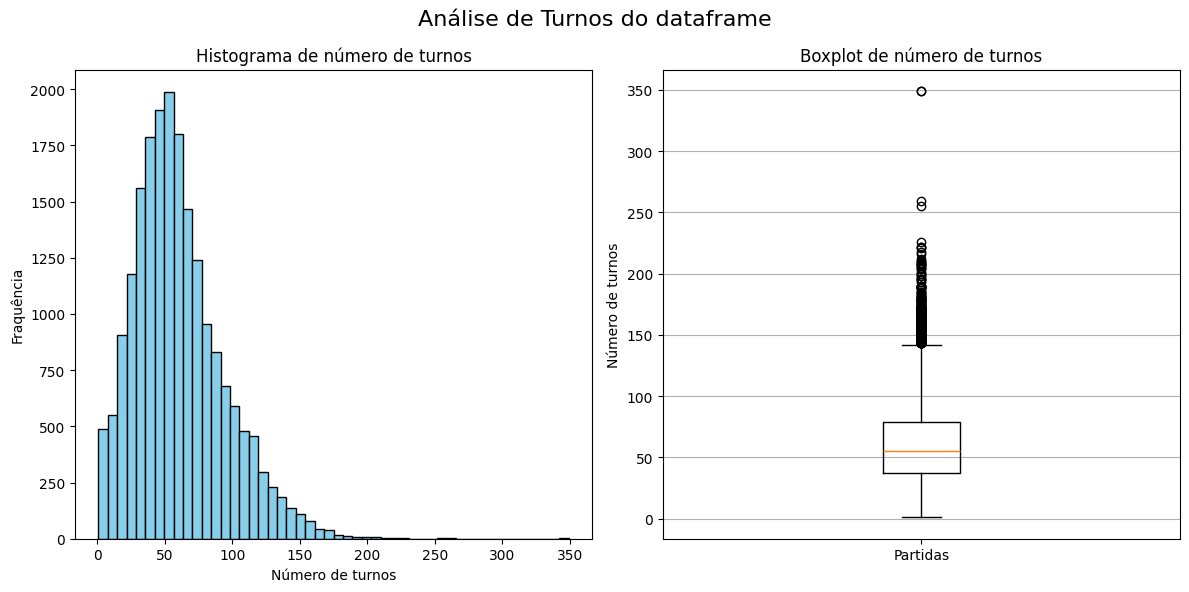

In [57]:
import matplotlib.pyplot as plt

#Primeiro eu fiz o histograma sozinho, depois pesquisei como fazer lado a lado do boxplot
# plt.hist(dataframe["turns"], bins=50, color="blue", edgecolor="black")
# plt.xlabel("Turnos")
# plt.ylabel("Frequência")
# plt.title("Histograma de duração das partidas (em turnos)")
# plt.show()

#Criando uma função para auxilio
def plot_histograma_boxplot(dataframe):
  #Criando uma figura para plotar tanto o histograma quanto o boxplot
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))
  #Cada posicao de axs é um gráfico
  axs[0].hist(dataframe["turns"], bins=50, color="skyblue", edgecolor="black")
  axs[0].set_xlabel("Número de turnos")
  axs[0].set_ylabel("Fraquência")
  axs[0].set_title("Histograma de número de turnos")

  axs[1].boxplot(dataframe["turns"], vert=True)
  axs[1].set_title("Boxplot de número de turnos")
  axs[1].set_ylabel("Número de turnos")
  axs[1].set_xticklabels(["Partidas"])
  axs[1].grid(axis='y')

  fig.suptitle('Análise de Turnos do dataframe', fontsize=16)
  #Deixando o layout bonito
  plt.tight_layout()
  plt.show()

plot_histograma_boxplot(dataframe)

Os gráficos de histograma e boxplot mostram uma tendência das partidas durarem entre 50 e 60 turnos. Temos também alguns valores que não fazem sentido, como por exemplo partidas com menos de 4 turnos.

Vamos remover essas partidas com menos de 4 turnos, basta associar o dataframe onde os dados tenham turnos maiores que 3.

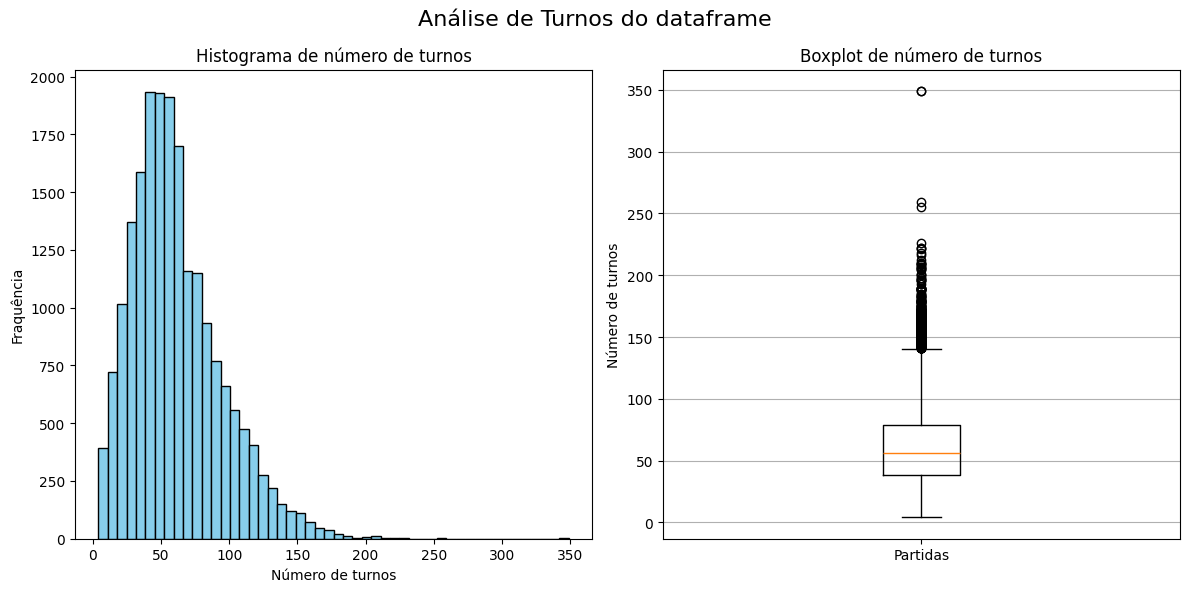

In [58]:
dataframe = dataframe[dataframe["turns"] > 3]
plot_histograma_boxplot(dataframe)


No dataset foi inserido a variável de game_time. Como não faz sentido partidas com um total de "0 segundos", vamos excluir esses dados também. 

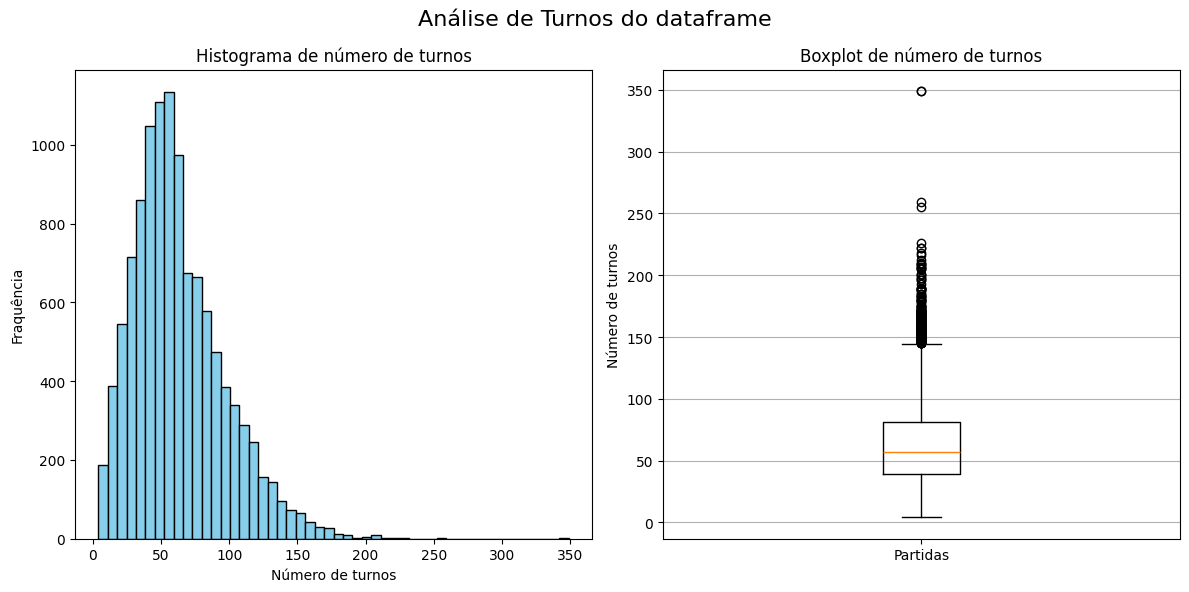

In [59]:
dataframe = dataframe[dataframe["game_time"] > pd.Timedelta(0)]
plot_histograma_boxplot(dataframe)

Porém, no dataset há a informação da variável increment_code, que dita o ritmo da partida. Temos que levar ela em consideração na hora de analizar a quantidade de turnos, visto que um increment_code maior permite partidas mais longas enquanto um menor partidas mais rápidas. 

Na conclusão do trabalho eu falo mais sobre o increment_code.

## Perguntas

### Quais as aberturas mais comuns?

Lembrando que foi normalizado os nomes das aberturas, todas para letra maiúscula.

<Axes: title={'center': 'As 20 aberturas mais comuns no xadrez'}, ylabel='opening_name'>

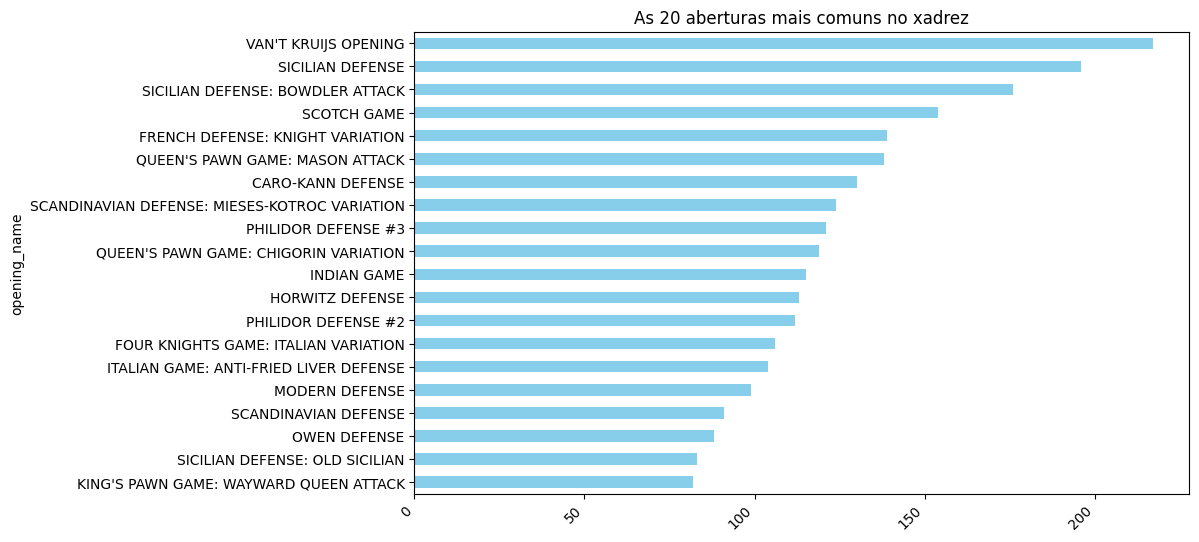

In [60]:
#Capturando os nomes das aberturas mais comuns e ordenando de forma decrescente
qtd_aberturas = 20 #Definindo o limite de captura das aberturas
aberturas = dataframe["opening_name"].value_counts().head(qtd_aberturas).sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.title(f"As {qtd_aberturas} aberturas mais comuns no xadrez")
plt.xlabel("Abertura")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha="right")
aberturas.plot(kind="barh", color="skyblue")

### Qual abertura tem maior taxa de vitória?

Como a variável "winner" está separada por cor da peça, temos que contar as vitórias de cada cor e depois soma-las.

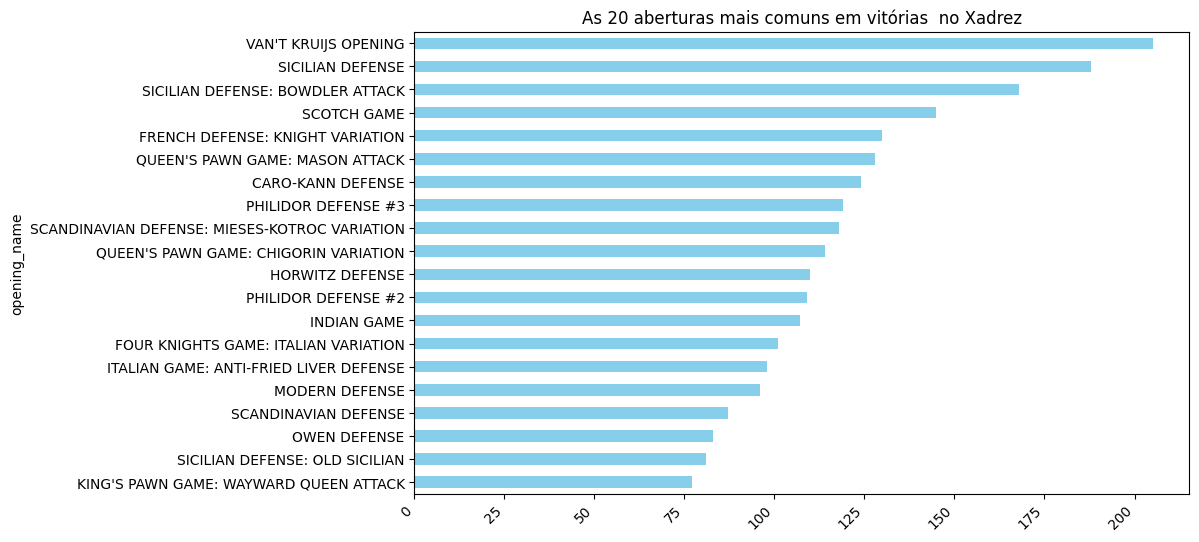

In [61]:
qtd_vitorias_brancas = dataframe[dataframe["winner"] == "WHITE"]["opening_name"].value_counts()
qtd_vitorias_pretas = dataframe[dataframe["winner"] == "BLACK"]["opening_name"].value_counts()

#Utilizando o .add com fill_value = 0 garante que se a abertura não existir em um dos dataframes, o valor na soma será 0
#usando o sort_values para ordernar e depois capturar as 25 mais comuns
total_vitorias = qtd_vitorias_brancas.add(qtd_vitorias_pretas, fill_value=0).sort_values(ascending=False).head(qtd_aberturas)

#Ordenando apenas para mostrar o gráfico do maior para o menor
total_vitorias = total_vitorias.sort_values()
plt.figure(figsize=(10,6))
plt.title(f"As {qtd_aberturas} aberturas mais comuns em vitórias  no Xadrez")
plt.xlabel("Abertura")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha="right")

total_vitorias.plot(kind="barh", color="skyblue")
plt.show()

### As aberturas mais famosas resultam em que tipo de fim de jogo?

O victory_status dita de quais formas a partida terminou, podendo ser DRAW, MATE, OUTOFTIME e RESIGN (todas explicadas anteriormente).

victory_status                                 DRAW  MATE  OUTOFTIME  RESIGN
opening_name                                                                
CARO-KANN DEFENSE                                 5    39          9      77
FOUR KNIGHTS GAME: ITALIAN VARIATION              5    40          5      56
FRENCH DEFENSE: KNIGHT VARIATION                  9    46          9      75
HORWITZ DEFENSE                                   3    43         17      50
INDIAN GAME                                       8    34          9      64
ITALIAN GAME: ANTI-FRIED LIVER DEFENSE            6    30         12      56
KING'S PAWN GAME: WAYWARD QUEEN ATTACK            5    36          9      32
MODERN DEFENSE                                    3    31          9      56
OWEN DEFENSE                                      4    33          9      42
PHILIDOR DEFENSE #2                               3    45          8      56
PHILIDOR DEFENSE #3                               2    42         13      64

Text(0.5, 1.0, 'Resultados da partida dado o tipo de abertura')

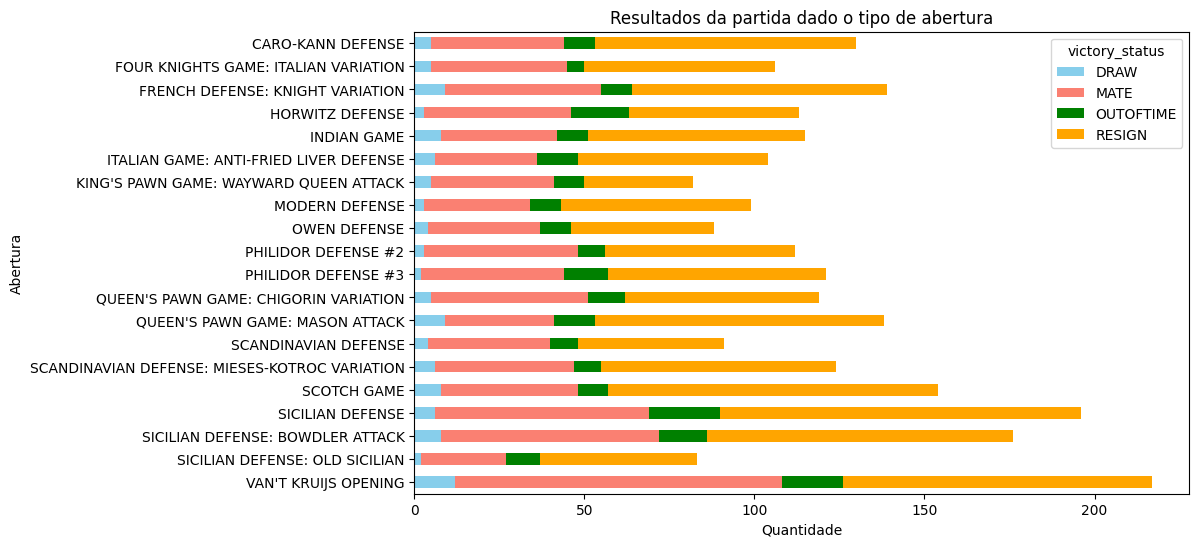

In [62]:

                                                    #lembrando que a variavel qtd_aberturas foi definida no começo da sessão.
aberturas = dataframe["opening_name"].value_counts().head(qtd_aberturas).index

#Filtrando o dataframe pra retornar somente os valores das aberturas mais famosas ("isin" pode ser lido como "Está em")
filtrando_aberturas = dataframe[dataframe["opening_name"].isin(aberturas)]

#                                                                             #Reset index necessário pois alteramos a estrutura do dataframe
status_final = filtrando_aberturas.groupby(["opening_name", "victory_status"]).size().reset_index(name="count")

#A tabela de pivo deixa mais claro os dados extraidos de um dataframe e também facilita a plotagem dos gráficos
                                                                                                #fillna == Substitui os valores nulos por 0
tabela_formatada = status_final.pivot(index='opening_name', columns='victory_status', values='count').fillna(0)
print(tabela_formatada)

tabela_formatada.sort_index(ascending=False).plot(kind="barh", stacked=True, figsize=(10, 6), color=["skyblue", "salmon", "green", "orange"])
plt.xlabel("Quantidade")
plt.ylabel("Abertura")
plt.title("Resultados da partida dado o tipo de abertura")




### Qual horário mais comuns das partidas?

Para verificar isso, vamos utilizar a variável que foi criada anteriormente, a created_at_dt, capturando somente a hora (utilizando a função dt.hour).

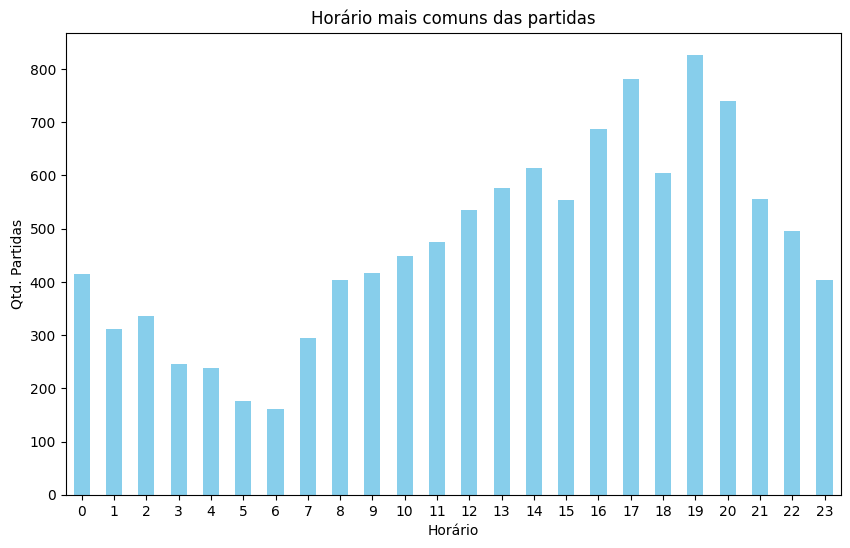

In [63]:
df_horarios_frequentes = dataframe["created_at_dt"].dt.hour
horarios_frequentes = df_horarios_frequentes.value_counts().sort_index()

horarios_frequentes.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.xlabel("Horário")
plt.ylabel("Qtd. Partidas")
plt.title("Horário mais comuns das partidas")
#Deixando os horários do gráfico "em pé"
plt.xticks(rotation=0)
plt.show()

## Relação entre variáveis
### A quantidade de turnos impacta no tempo de partida?

Usando o campo "game_time", podemos plotar um gráfico de dispersão para visualizarmos a relação entre tempo de partido e o número de turnos.

Como temos alguns outliers, foi definido o limite de turnos para 200 e o tempo de partida para 1h30min (90min) (no gráfico), apenas para fins de visualização.

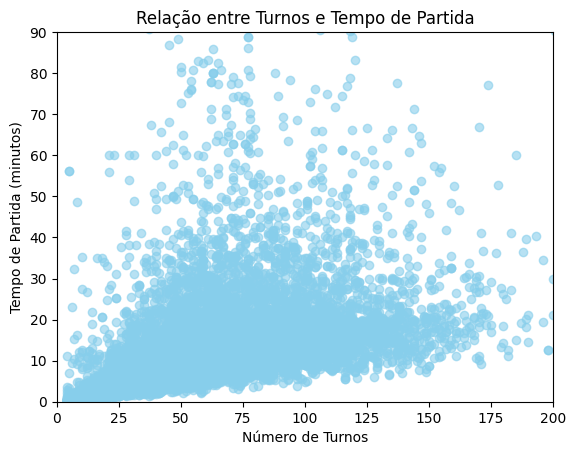

In [64]:
#Apenas criando uma copia do dataframe original
dataframe_temp = dataframe.copy()
dataframe_temp['game_time_minutes'] = dataframe['game_time'].dt.total_seconds() / 60 
                                                                         #O alpha define apenas a transparência dos pontinhos
plt.scatter(dataframe_temp["turns"], (dataframe_temp["game_time_minutes"]) , alpha=0.6, color="skyblue")

#Definindo os limites dos campos para 60 minutos e 200 turnos, apenas para fins de visualização.
plt.ylim(0, 90)
plt.xlim(0, 200)
plt.xlabel('Número de Turnos')
plt.ylabel('Tempo de Partida (minutos)')
plt.title('Relação entre Turnos e Tempo de Partida')
plt.show()

Como pode-se visualizar no gráfico, mesmo em partidas com quantidade de turnos pequenas, as mesmas podem demandar tempo significativo.

### O horário impacta no número de turnos?

Usando o campo created_at_dt e capturando a hora de início, vamos analisar se os horários de início da partida impacta a quantidade de turnos da mesma.

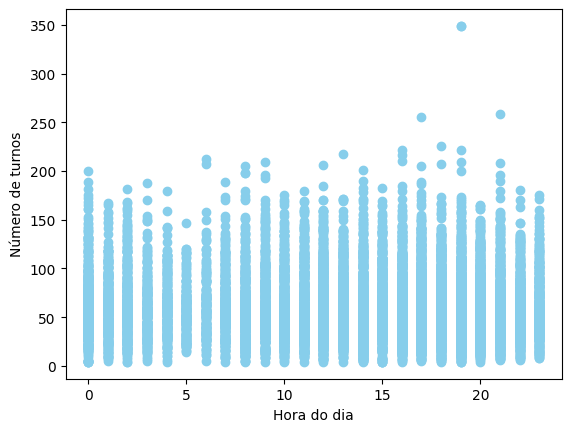

In [65]:
plt.scatter(dataframe["created_at_dt"].dt.hour, dataframe["turns"], color="skyblue")
plt.xlabel("Hora do dia")
plt.ylabel("Número de turnos")
plt.show()

Como podemos visualizar no gráfico, não há correlação entre a hora do dia e o número de turnos, apesar de termos alguns outliers (como por exemplo às 19h).

### O horário impacta no resultado da partida?

Será que o horário da partida impacta em um mate? Vamos ver no gráfico de barras empilhado

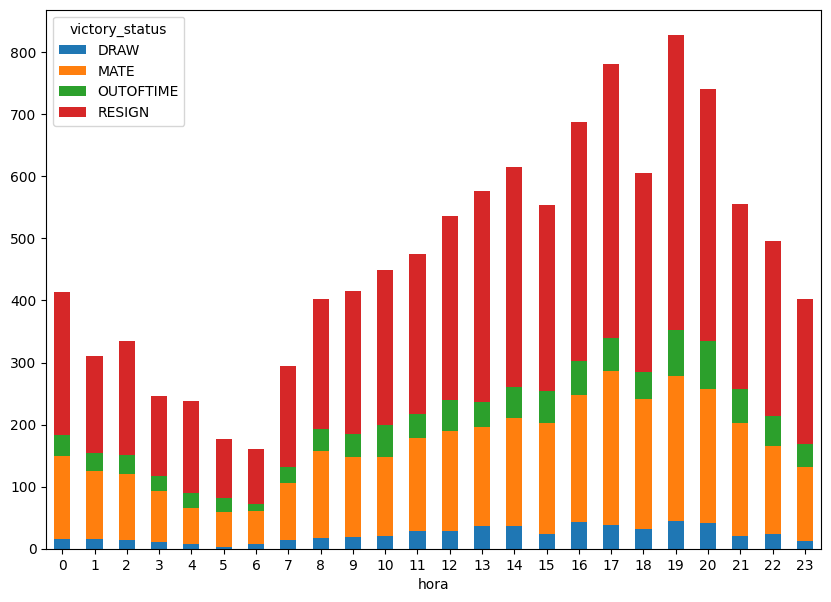

In [66]:
dataframe_temp = dataframe.copy()
dataframe_temp["hora"] = dataframe_temp["created_at_dt"].dt.hour
resultado_partida = dataframe_temp.groupby(["hora", "victory_status"]).size().unstack(fill_value=0)

resultado_partida.plot(kind="bar", stacked=True, figsize=(10,7))
plt.xticks(rotation=0)
plt.show()

Lembrando que, o horário mais comum de se iniciar uma partida é às 19h, então por consequência, é neste horário que teremos maior variedade de status final da partida e também, a maior quantidade de MATE.



### Resultados mais comuns ao término de uma partida?

Vamos visualizar em um gráfico de setores (ou gráfico de pizza) os resultados mais comuns ao término das partidas.

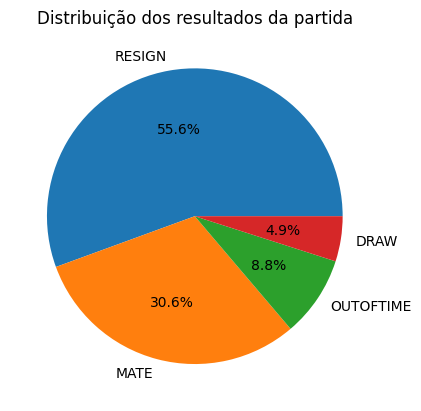

In [67]:
resultados_partida = dataframe["victory_status"].value_counts()

                                                              #Para exibir as porcentagens dentro do gráfico
plt.pie(resultados_partida, labels=resultados_partida.index, autopct='%1.1f%%')
plt.title("Distribuição dos resultados da partida")
plt.show()

Como podemos visualizar no gráfico, 55.6% das partidas terminam em RESIGN, ou seja, quando o oponente abandona a partida e dá a vitória ao ser adversário (Será porque viu que estava numa situação desfavorável e entendeu que não havia como sair da mesma?) e em segundo lugar, com 30.6%, o MATE, quando o rei adversário está sob ataque e não há nada que o oponente possa fazer para livrar o rei da situação.

# Analisando correlações!

## Matriz de correlação

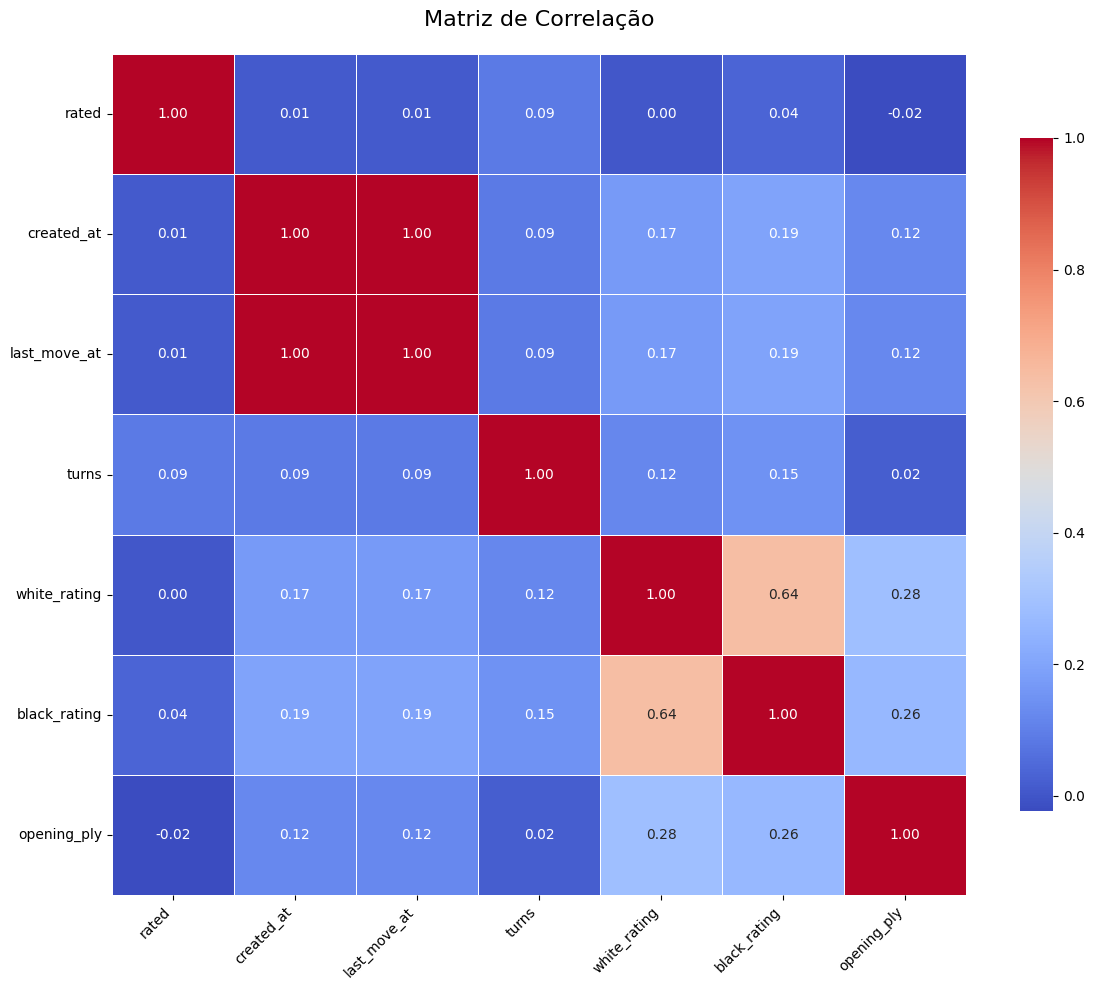

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
correlation_matrix = dataframe.corr(numeric_only=True)

# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Cria o heatmap com mais espaço e melhor rotação dos rótulos
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}  # Encolhe a barra de cor para não sobrepor
)

# Rotaciona os rótulos do eixo x
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Matriz de Correlação", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


### Problemas na matriz! (E também depois...)

Nem todos os atributos apareceram, somente os númericos. Então... Como proceder? Codificar!

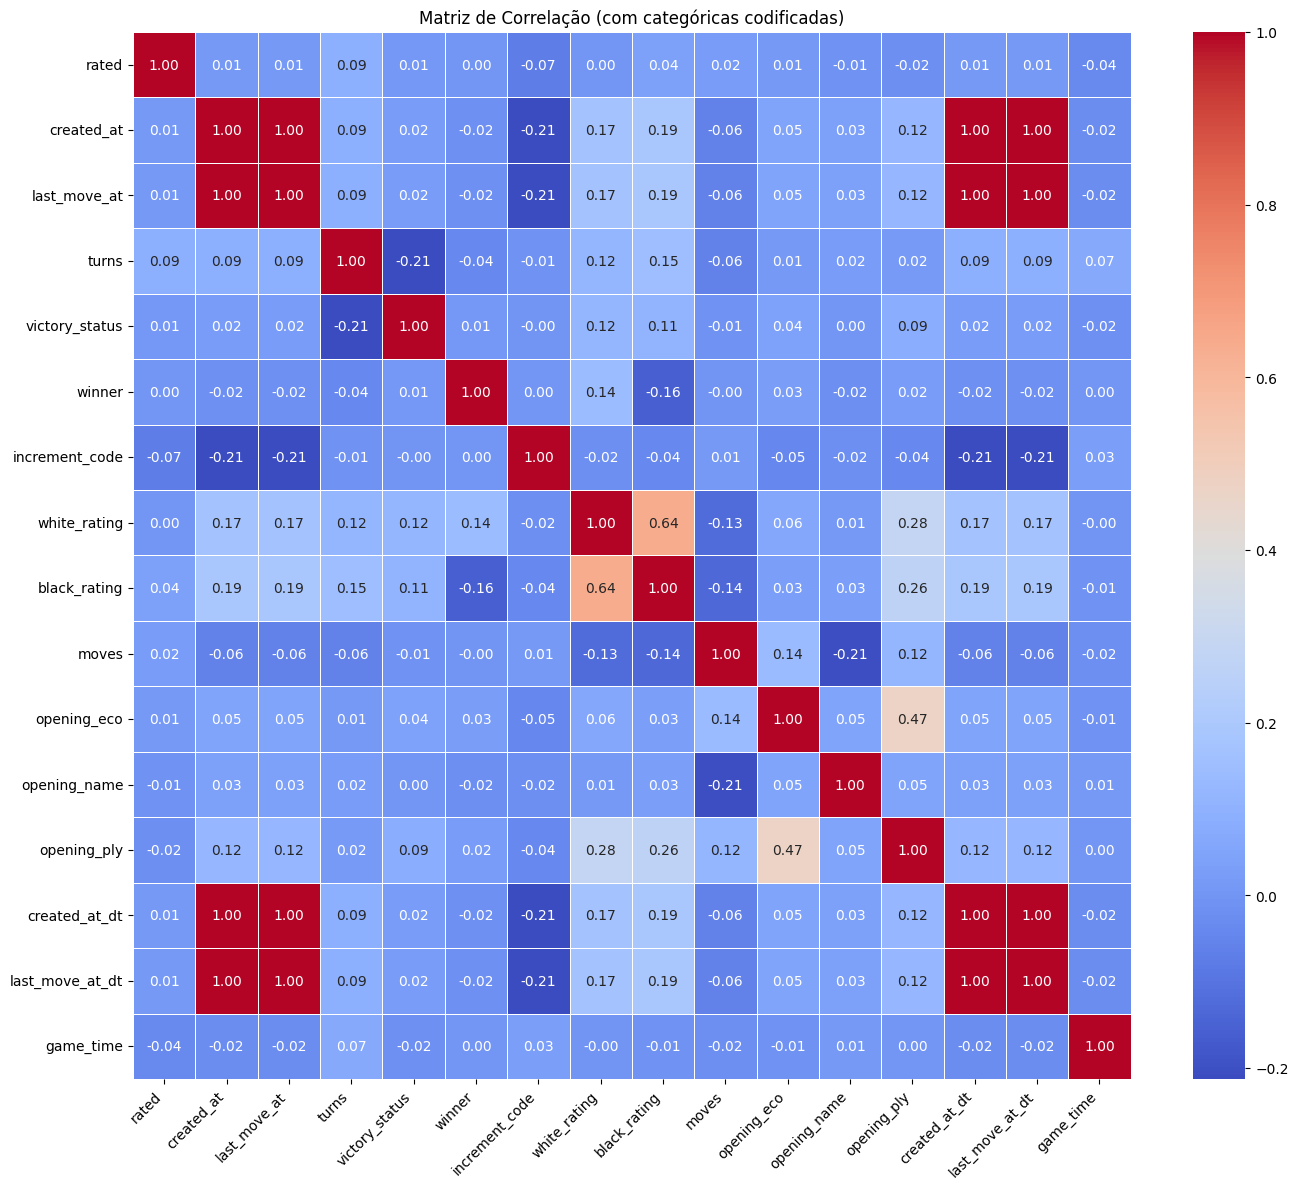

In [69]:
from sklearn.preprocessing import OrdinalEncoder

df_encoded = dataframe.copy()

# Identifica as colunas não numéricas
cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

# Aplica o encoder
encoder = OrdinalEncoder()
df_encoded[cat_cols] = encoder.fit_transform(df_encoded[cat_cols])

# Agora calcula a correlação incluindo essas colunas
correlation_matrix = df_encoded.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title("Matriz de Correlação (com categóricas codificadas)")
plt.tight_layout()
plt.show()


Correlações fracas geram problemas!

### Dataframe codificado 

In [70]:
df_encoded.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_time
14,False,1.504090e+12,1.504100e+12,31,1.0,2.0,96.0,1094,1141,7628.0,190.0,254.0,8,2017-08-30 10:46:40,2017-08-30 13:33:20,0 days 02:46:40
43,False,1.499610e+12,1.499620e+12,66,3.0,2.0,237.0,2443,978,5071.0,123.0,1054.0,17,2017-07-09 14:20:00,2017-07-09 17:06:40,0 days 02:46:40
49,False,1.498400e+12,1.498410e+12,41,1.0,2.0,237.0,2436,978,6267.0,64.0,973.0,4,2017-06-25 14:13:20,2017-06-25 17:00:00,0 days 02:46:40
52,False,1.497890e+12,1.497900e+12,53,1.0,2.0,18.0,978,1500,3500.0,55.0,163.0,2,2017-06-19 16:33:20,2017-06-19 19:20:00,0 days 02:46:40
54,True,1.503220e+12,1.503230e+12,8,3.0,2.0,114.0,1521,1162,329.0,4.0,1253.0,2,2017-08-20 09:06:40,2017-08-20 11:53:20,0 days 02:46:40


## Quais seriam os próximos passos?

Criar um modelo para tentar prever quem ganharia a partida!

Com base no tipo de abertura, movimentos iniciais, etc.